<h1 style="color: #492c68;">01 | PREPROCESSING FOR ML</h1>

<h2 style="color: #327a81;">Libraries</h2>

In [1]:
## Basic libraries
import pandas as pd # data manipulation
import numpy as np # funciones matemáticas

## EDA Libraries 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [2]:
## Pre-processing for modeling

import re # Natural Language Toolkit to adapt text lines for ML
import nltk
nltk.download('stopwords') #language package for spanish
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer

import gensim # take text for clean and tokenize list of words
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\antdo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
## For tags EDA

from wordcloud import WordCloud, STOPWORDS

<h2 style="color: #327a81;">Data Standardization</h2>

<h3 style="color: #60b671;">Data extraction</h3>

In [4]:
fake = pd.read_csv("onlyfakes1000.csv")

In [5]:
true = pd.read_csv("onlytrue1000.csv")

In [6]:
df1 = fake.copy()
df2 = true.copy()

In [7]:
df1.head(5)

,text
0,El suceso ha tenido lugar en Brasil. Un adole...
1,Estamos en la semana decisiva. Los expertos a...
2,Estudios científicos hay muchos. Unos nos int...
3,Ha sucedido en la ciudad de San José de Río P...
4,La fiesta en Sevilla por el vuelco electoral ...


In [8]:
df2.head(5)

,text
0,Algunas de las voces extremistas más conocida...
1,Después de casi dos años y medio de luchas po...
2,Dos periodistas birmanos de la agencia Reuter...
3,El Cuerpo Nacional de Policía ha detenido a c...
4,El desfile de la firma en Roma se convierte e...


<h3 style="color: #60b671;">First Exploration</h3>

In [9]:
df1.shape

(1000, 1)

In [10]:
df2.shape

(1000, 1)

<h3 style="color: #60b671;">Datasets unification</h3>

In [11]:
#Let's assing new columns for further works

df1["state"] = 0 #0 equal fake
df2["state"] = 1 #1 equal true

df1["type_news"] = "Fake"
df2["type_news"] = "Real"    

In [12]:
df = pd.concat([df1,df2])

In [13]:
df = df.sample(frac=1).reset_index(drop=True)

In [14]:
df

,text,state,type_news
0,Por si sabéis de alguien: Van a sacrificar 6 c...,0,Fake
1,#CruzRoja se niega en #Algeciras a ayudar a un...,0,Fake
2,Si alguien sigue la actualidad municipal y la...,1,Real
3,"La francesa Stéphanie Frappart , que entrará e...",1,Real
4,"A esto tranquilo que no te responderán, o sí: ...",0,Fake
...,...,...,...
1995,Otegi reclama la salida de prisión de todos lo...,0,Fake
1996,"Carmen Jiménez es una vecina de Madrid, España...",0,Fake
1997,"Si cuando suena el despertador es lunes, se ha...",0,Fake
1998,Antonio Banderas y Nicole Kimpel durante la p...,1,Real


<h3 style="color: #60b671;">Cheking up: nulls/duplicates</h3>

In [15]:
df.isnull().sum()

text         0
state        0
type_news    0
dtype: int64

In [16]:
df.duplicated().sum()

42

<h2 style="color: #327a81;">Preprocessing for Training</h2>

<h3 style="color: #60b671;">"state" to categorical</h3>

In [17]:
# To use "state" column for classification, we need to transform it to categorical

df["state"] = pd.Categorical(df["state"])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   text       2000 non-null   object  
 1   state      2000 non-null   category
 2   type_news  2000 non-null   object  
dtypes: category(1), object(2)
memory usage: 33.5+ KB


In [19]:
df["state"].value_counts()

state
0    1000
1    1000
Name: count, dtype: int64

<h3 style="color: #60b671;">"text" cleaning to "tags"</h3>

In [20]:
# Need to clean "text" to provide value words for ML modeling
# NLTK will help us to earse unnecesary prepositions and others

stop_words = list(stopwords.words("spanish"))

In [21]:
'''
I figured, after a value counts for EDA in a future step, that there are plenty of stop words that NLKT 
doesnt have, so i go backwards to including them in this step
'''

stop_words.extend(["según", "ahora", "después", "todas", "toda", "todo", "todos", "sólo", "solo", "sido", "están",
                   "estan", "hacer", "hecho", "puede", "tras", "cabe", "bajo", "durante", "mediante", "cada", "me",
                  "lunes", "martes", "miércoles", "jueves", "viernes", "sabado", "domingo"])

In [22]:
# Now with stop_words, we can treat raw news and transform it for ML

def text_cleaner(text):
    words = []
    for word in gensim.utils.simple_preprocess(text):
        if word not in gensim.parsing.preprocessing.STOPWORDS and word not in stop_words and len(word) > 4:
            words.append(word)
    return words

In [23]:
text = df["text"]

In [24]:
text_cleaned = []

for ele in text:
    cleaned_text = text_cleaner(ele)
    text_cleaned.append(cleaned_text)

In [25]:
df["tags"] = text_cleaned
df.head(5)

,text,state,type_news,tags
0,Por si sabéis de alguien: Van a sacrificar 6 c...,0,Fake,"[sabéis, alguien, sacrificar, cachorritos, dal..."
1,#CruzRoja se niega en #Algeciras a ayudar a un...,0,Fake,"[cruzroja, niega, algeciras, ayudar, ciudadano..."
2,Si alguien sigue la actualidad municipal y la...,1,Real,"[alguien, sigue, actualidad, municipal, promes..."
3,"La francesa Stéphanie Frappart , que entrará e...",1,Real,"[francesa, stéphanie, frappart, entrará, histo..."
4,"A esto tranquilo que no te responderán, o sí: ...",0,Fake,"[tranquilo, responderán, fascista, vienen, pag..."


<h3 style="color: #60b671;">Counting "tags" for reference</h3>

In [26]:
tags_group = df["tags"]

In [27]:
tag_len = []

for tags in tags_group:
    tags_len = len(tags)
    tag_len.append(tags_len)

In [28]:
df["n_of_tags"] = tag_len

<h3 style="color: #60b671;">Joining "tags" into "text ml"</h3>

In [29]:
new_text = []

for tags in tags_group:
    new_tags = " ".join(tags)
    new_text.append(new_tags)

In [30]:
df["text_ml"] = new_text

In [31]:
df.sample(5)

,text,state,type_news,tags,n_of_tags,text_ml
1712,El museo más grande del mundo no ha abierto su...,1,Real,"[museo, grande, mundo, abierto, puertas, mañan...",14,museo grande mundo abierto puertas mañana empl...
475,Desde este blog ya denunciamos en exclusiva co...,0,Fake,"[denunciamos, exclusiva, periodistas, manipula...",17,denunciamos exclusiva periodistas manipulaban ...
334,Estudios científicos hay muchos. Unos nos int...,0,Fake,"[estudios, científicos, interesan, concreto, d...",16,estudios científicos interesan concreto delici...
1046,Solo los maestros y tres nuevos alumnos hablan...,0,Fake,"[maestros, nuevos, alumnos, hablan, español, c...",20,maestros nuevos alumnos hablan español colegio...
178,"""A pesar de lo que se ha escrito y dicho sobre...",1,Real,"[pesar, escrito, dicho, abdicación, pienso, pe...",15,pesar escrito dicho abdicación pienso pesar ca...


<h1 style="color: #492c68;">02 | PREPROCESSING EDA</h1>

<h2 style="color: #327a81;">Checking Data Outliers</h2>

<Axes: xlabel='n_of_tags', ylabel='Count'>

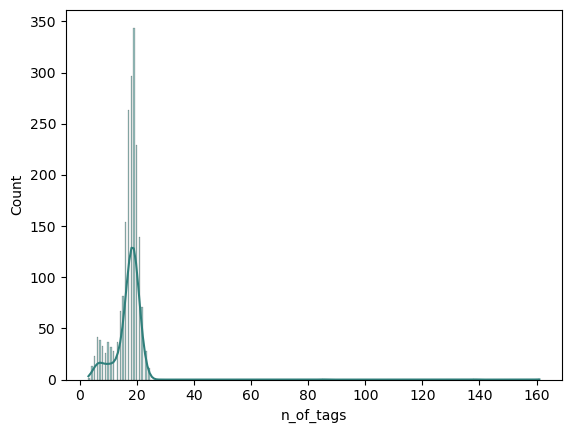

In [32]:
#Let's check our data distribution through number of tags

sns.histplot(x=df["n_of_tags"], color="#2f7f7b", bins="auto", kde=True)

<Axes: xlabel='n_of_tags'>

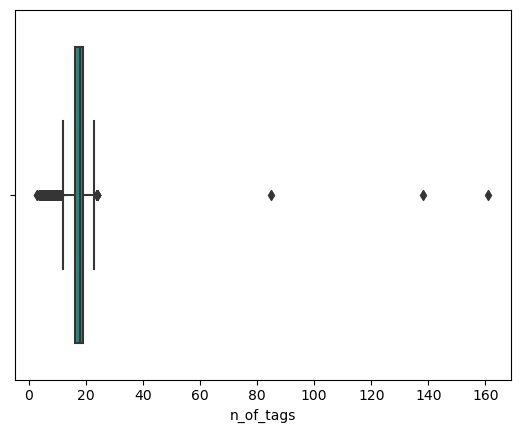

In [33]:
sns.boxplot(x=df["n_of_tags"], palette="viridis")

- We could kill the greater outliers to normalize and have a better data performance

In [34]:
df = df[(df["n_of_tags"] < 80)]

<Axes: xlabel='n_of_tags', ylabel='Count'>

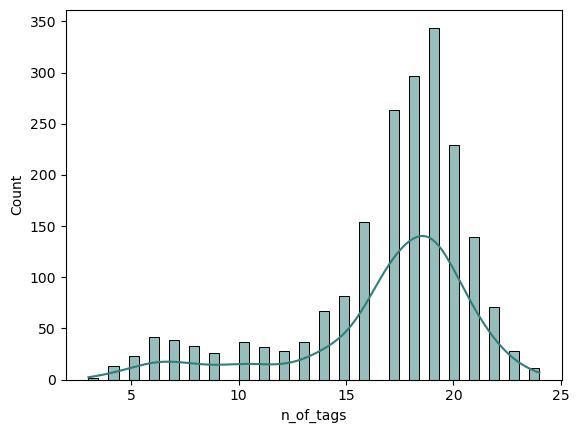

In [35]:
# Cheking again after killing bigger outliers

sns.histplot(x=df["n_of_tags"], color="#2f7f7b", bins="auto", kde=True)

<Axes: xlabel='n_of_tags'>

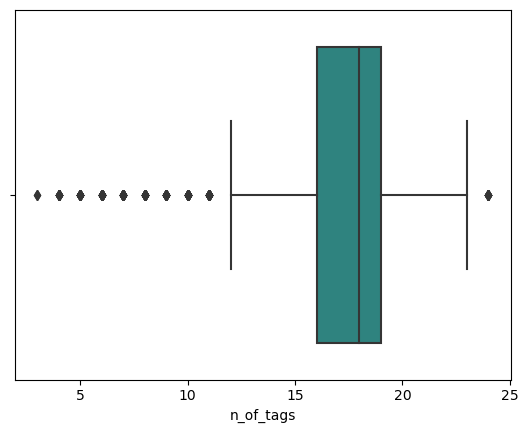

In [36]:
sns.boxplot(x=df["n_of_tags"], palette="viridis")

<h2 style="color: #327a81;">Fake News vs Real News</h2>

In [37]:
only_fakes = df[(df["type_news"] == "Fake")]
only_real = df[(df["type_news"] == "Real")]

<h3 style="color: #60b671;">Fake News</h3>

In [38]:
# How is the average number of tags per Fake News?

fk_avg_tags = only_fakes["n_of_tags"].mean().round(2)
print(f"Average number of Fake News Tags: {fk_avg_tags}")

Average number of Fake News Tags: 16.71


In [39]:
# Let's see most repeated words for Fake News

count_fakes = []

for tags_list in only_fakes["tags"]:
    for tag in tags_list:
        count_fakes.append(tag)        

In [40]:
df_count_fakes = pd.DataFrame(count_fakes)

In [41]:
df_count_fakes = df_count_fakes.value_counts()

In [42]:
top_10_fakes = df_count_fakes.reset_index().set_index(0).head(10)

In [43]:
top_10_fakes.index.name = "tag"

In [44]:
top_10_fakes

,count
tag,
españa,97
gobierno,82
sánchez,45
inmigrantes,43
presidente,41
madrid,41
pedro,41
mundo,40
podemos,37


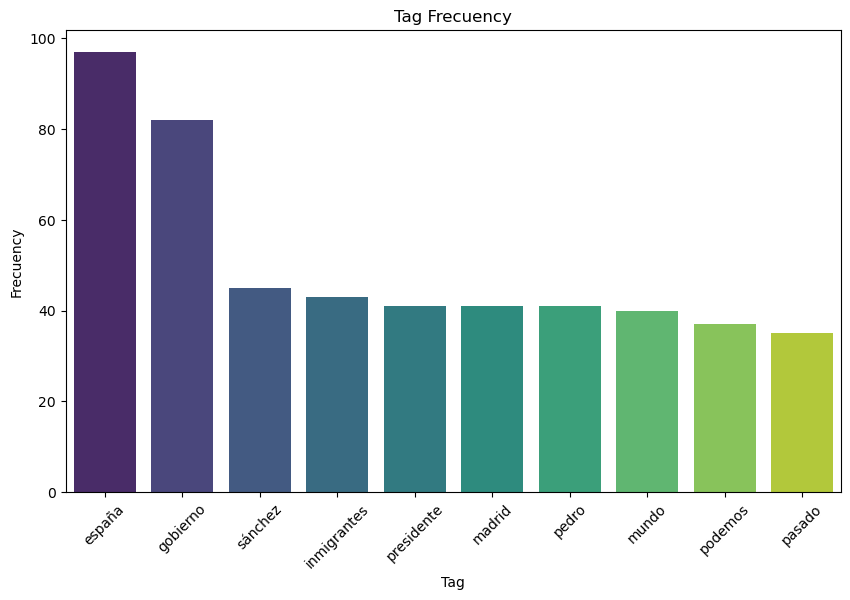

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_fakes.index, y="count", data=top_10_fakes, palette="viridis")
plt.title("Tag Frecuency")
plt.xlabel("Tag")
plt.ylabel("Frecuency")
plt.xticks(rotation=45)  
plt.show()

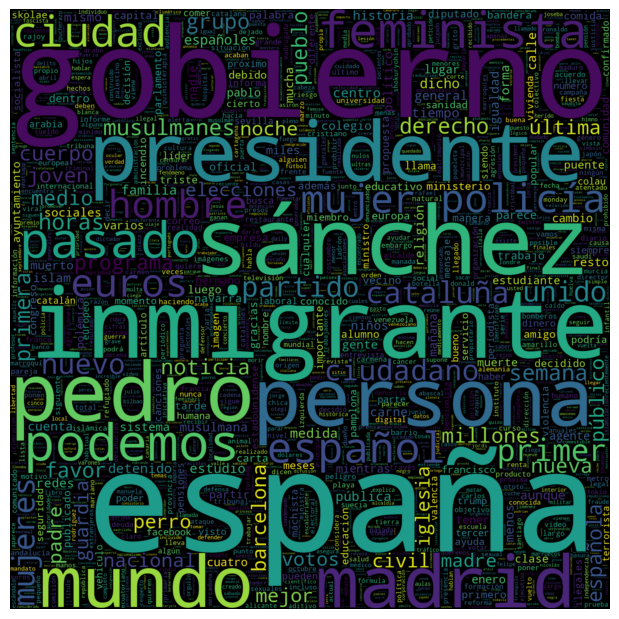

In [46]:
# To do it more visual, we plot a wordcloud 

fake_text = " ".join(df[df.state == 0].text_ml)

plt.figure(figsize=(6,6))
              
word_cloud = WordCloud(
        max_words=2000,
        width=1500,
        height=1500,
        random_state=42,
        colormap="viridis",
        collocations=False,
        stopwords= stop_words,
        ).generate(fake_text)

plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

<h3 style="color: #60b671;">Real News</h3>

In [47]:
# How is the average number of tags per fake news?

re_avg_tags = only_real["n_of_tags"].mean().round(2)
print(f"Average number of Real News Tags: {re_avg_tags}")

Average number of Real News Tags: 17.03


In [48]:
# Most repeated words for Real News

count_reals = []

for tags_list in only_real["tags"]:
    for tag in tags_list:
        count_reals.append(tag)

In [49]:
df_count_reals = pd.DataFrame(count_reals)

In [50]:
df_count_reals = df_count_reals.value_counts()

In [51]:
top_10_reals = df_count_reals.reset_index().set_index(0).head(10)

In [52]:
top_10_reals.index.name = "tag"

In [53]:
top_10_reals

,count
tag,
gobierno,88
españa,71
personas,69
pasado,62
madrid,62
euros,53
barcelona,51
presidente,49
millones,48


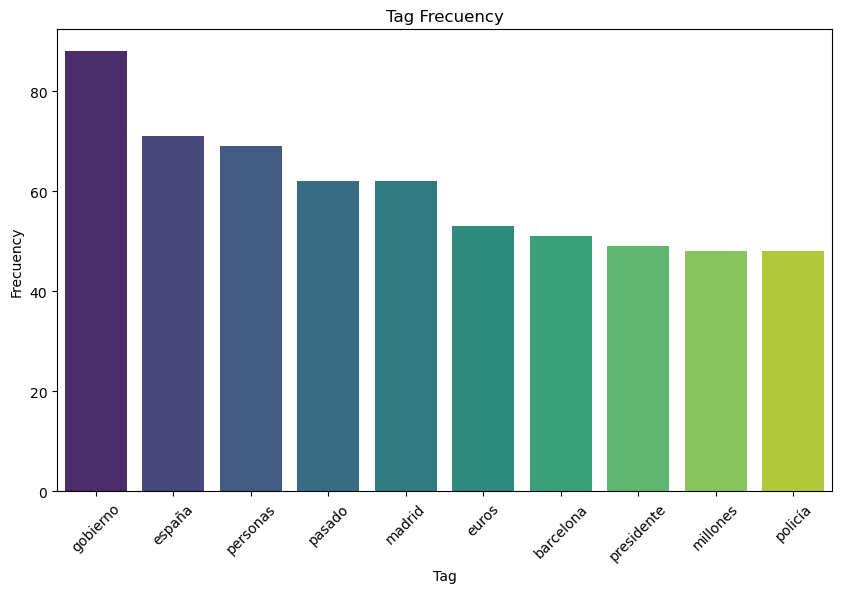

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_reals.index, y="count", data=top_10_reals, palette="viridis")
plt.title("Tag Frecuency")
plt.xlabel("Tag")
plt.ylabel("Frecuency")
plt.xticks(rotation=45)  
plt.show()

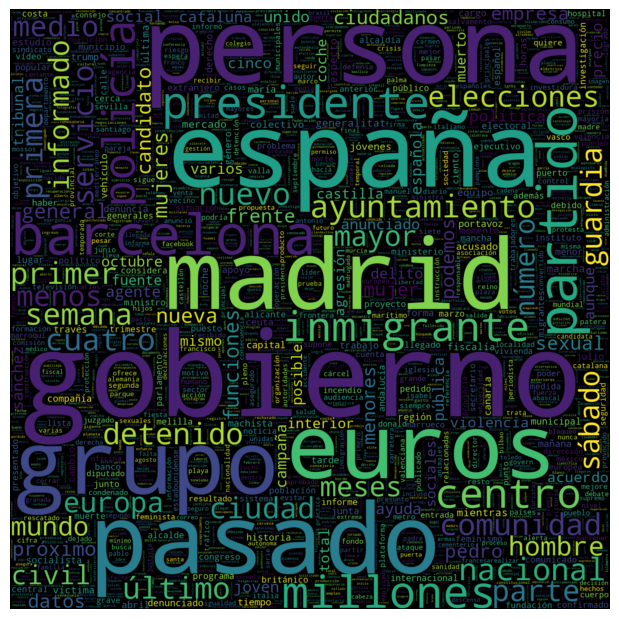

In [55]:
real_text = " ".join(df[df.state == 1].text_ml)

plt.figure(figsize=(6,6))
              
word_cloud = WordCloud(
        max_words=2000,
        width=1500,
        height=1500,
        random_state=42,
        colormap="viridis",
        collocations=False,
        stopwords= stop_words,
        ).generate(real_text)

plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

<h1 style="color: #492c68;">03 | MORE EDA: SENTIMENT ANALYSIS</h1>

<h2 style="color: #327a81;">Specific Librarie</h2>

In [56]:
## Uses Naive Bayes classification to predict spanish sentences sentiments

!pip install sentiment-analysis-spanish

from sentiment_analysis_spanish import sentiment_analysis

<h2 style="color: #327a81;">Sentiment Analysis</h2>

In [57]:
sia = sentiment_analysis.SentimentAnalysisSpanish()

In [58]:
sentiment = []

for index, row in df.iterrows():
    sentiment.append(sia.sentiment(row["text_ml"]))

In [59]:
df["numerical_sentiment"] = sentiment

In [60]:
df.sample()

,text,state,type_news,tags,n_of_tags,text_ml,numerical_sentiment
1043,Nissan Motor ha nombrado este viernes al esta...,1,Real,"[nissan, motor, nombrado, estadounidense, step...",20,nissan motor nombrado estadounidense stephen p...,0.050519


In [61]:
sent_segmented = []

for x in sentiment:
    if x <= 0.2:
        sent_segmented.append("Very Negative")
    elif x <= 0.4 and x > 0.2:
        sent_segmented.append("Negative")
    elif x <= 0.6 and x > 0.4:
        sent_segmented.append("Neutral")
    elif x <= 0.8 and x > 0.6:
        sent_segmented.append("Positive")
    elif x <= 1 and x > 0.8:
        sent_segmented.append("Very Positive")

In [62]:
df["sentiment"] = sent_segmented

In [63]:
df.sample()

,text,state,type_news,tags,n_of_tags,text_ml,numerical_sentiment,sentiment
285,Estamos en la semana decisiva. Los expertos a...,0,Fake,"[semana, decisiva, expertos, aseguran, campaña...",18,semana decisiva expertos aseguran campaña elec...,0.218135,Negative


<h3 style="color: #60b671;">Sentiment for Fake News</h3>

In [64]:
sent_fakes = df[(df["type_news"] == "Fake")]

In [65]:
sent_fakes["sentiment"].value_counts()

sentiment
Very Negative    530
Negative         151
Neutral          128
Very Positive    106
Positive          83
Name: count, dtype: int64

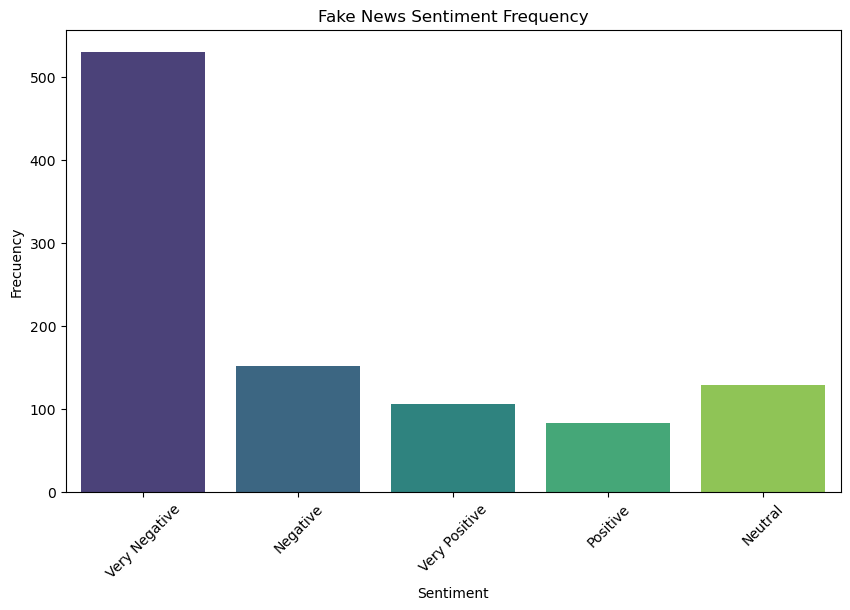

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x=sent_fakes["sentiment"], data=df, palette="viridis")
plt.title('Fake News Sentiment Frequency')
plt.xlabel('Sentiment')
plt.ylabel('Frecuency')
plt.xticks(rotation=45)  
plt.show()

<h3 style="color: #60b671;">Sentiment for Real News</h3>

In [67]:
sent_reals = df[(df["type_news"] == "Real")]

In [68]:
sent_reals["sentiment"].value_counts().sort_values(ascending=False)

sentiment
Very Negative    404
Negative         182
Neutral          164
Very Positive    157
Positive          92
Name: count, dtype: int64

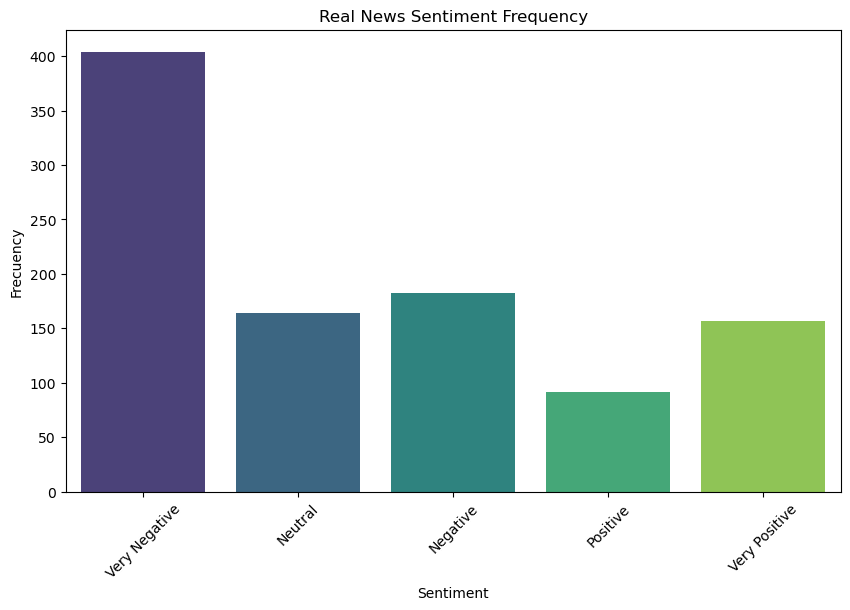

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(x=sent_reals["sentiment"], data=df, palette="viridis")
plt.title('Real News Sentiment Frequency')
plt.xlabel('Sentiment')
plt.ylabel('Frecuency')
plt.xticks(rotation=45)  
plt.show()

<h3 style="color: #60b671;">Sentiment comparision: Real vs Fake</h3>

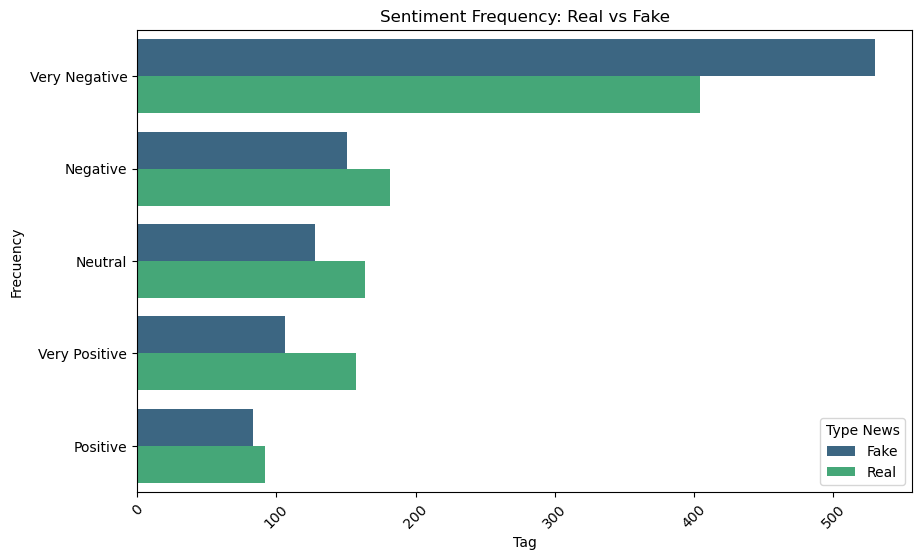

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df["sentiment"], data=df, hue="type_news", palette="viridis")
plt.title('Sentiment Frequency: Real vs Fake')
plt.xlabel('Tag')
plt.ylabel('Frecuency')
plt.legend(title="Type News")
plt.xticks(rotation=45)  
plt.show()

<h2 style="color: #327a81;">Export DataFrame for Modeling</h2>

In [71]:
df.to_csv("to_modeling.csv")

<h1 style="color: #492c68;">03 | PREPROCESSING FOR TEST</h1>

<h2 style="color: #327a81;">Data Extraction and Standarization</h2>

In [72]:
test = pd.read_csv("fakes_test.csv")

In [73]:
test.sample(10)

,class,Text
1183,False,La pasada madrugada fue detenido el dueño de u...
1579,False,Según la información publicada por el diario D...
517,False,El 95% de plástico que contamina los océanos p...
158,True,La Generalitat de Catalunya ha alertado hoy d...
552,True,El Ayuntamiento de Pamplona ha pedido este sáb...
857,False,En Suecia estudian seis horas y tiene la mejor...
174,True,La sede del Partido Popular en Badalona ha am...
1021,False,"Joji, de 50 años, fue encontrado en su casa de..."
1185,False,La pensión por incapacidad permanente para may...
1341,True,Los mejores momentos del desfile de Victoria's...


In [74]:
test.shape

(2000, 2)

In [75]:
test.columns = test.columns.str.lower().str.replace(" ","_")

<h2 style="color: #327a81;">Text Preprocessing for TEST</h2>

In [76]:
test_text = test["text"]

In [77]:
test_text_cleaned = []

for ele in test_text:
    cleaned_test_text = text_cleaner(ele)
    test_text_cleaned.append(cleaned_test_text)

In [78]:
test["test_tags"] = test_text_cleaned

In [79]:
test.sample(10)

,class,text,test_tags
1596,False,Si alguien pudiera administrarte una vacuna qu...,"[alguien, pudiera, administrarte, vacuna, pudi..."
1509,False,"Progenitor diferente de la madre biológica"". I...","[progenitor, diferente, madre, biológica, incr..."
1834,False,Tras el nuevo ataque a la democracia de la Gua...,"[nuevo, ataque, democracia, guardia, civil, pa..."
957,True,Fue el 15 de agosto pasado cuando la Junta de ...,"[agosto, pasado, junta, andalucía, activó, ale..."
576,False,"El centro social afín a Podemos Málaga, la Cas...","[centro, social, podemos, málaga, invisible, c..."
1534,False,Rescate de un Jaguar en la Amazonía de Brasil ...,"[rescate, jaguar, amazonía, brasil, soldado, d..."
1978,True,La ONG de rescate marítimo Open Arms ha recib...,"[rescate, marítimo, recibido, premio, concede,..."
1270,False,Las autoridades suecas creen que con un día la...,"[autoridades, suecas, creen, laboral, corto, t..."
729,True,El portavoz municipal de Cs en el Ayuntamiento...,"[portavoz, municipal, ayuntamiento, ávila, mar..."
1621,True,"Solo la capital, Alcalá de Henares, Alcobendas...","[capital, alcalá, henares, alcobendas, boadill..."


In [80]:
test_tags = test["test_tags"]

In [81]:
test_tags

0       [voces, extremistas, conocidas, cuentas, asoci...
1       [medio, luchas, políticas, judiciales, donald,...
2       [periodistas, birmanos, agencia, reuters, libe...
3       [cuerpo, nacional, policía, detenido, cuatro, ...
4       [desfile, firma, convierte, libertad, mujeres,...
                              ...                        
1995    [consejo, gobierno, visto, bueno, convocatoria...
1996    [investigadores, valencianos, desarrollado, in...
1997    [arrestados, actuaban, coches, policía, nacion...
1998    [encargado, pedro, sánchez, presente, investid...
1999    [pruebas, realizadas, centro, nacional, microb...
Name: test_tags, Length: 2000, dtype: object

In [82]:
test_text = []

for tags in test_tags:
    new_tags_test = " ".join(tags)
    test_text.append(new_tags_test)

In [83]:
test["test_text"] = test_text

In [84]:
test.sample(10)

,class,text,test_tags,test_text
1481,True,Pocas palabras han sido tan maleadas en los úl...,"[pocas, palabras, maleadas, últimos, tiempos, ...",pocas palabras maleadas últimos tiempos fascis...
243,False,¿Llamas mínimo error a más de 40.000 votos nul...,"[llamas, mínimo, error, votos, nulos, valencia...",llamas mínimo error votos nulos valencia votos...
1314,False,Los Alcázares ( Murcia) Curso escolar 2019/ 20...,"[alcázares, murcia, curso, escolar, quitan, re...",alcázares murcia curso escolar quitan religión...
1174,False,La noticia de “la novatada” de la Complutense ...,"[noticia, novatada, complutense, septiembre, o...",noticia novatada complutense septiembre omite ...
882,False,"Es sábado, apenas las nueve de la mañana. Sant...","[sábado, apenas, nueve, mañana, santiago, abas...",sábado apenas nueve mañana santiago abascal lí...
553,True,El Ayuntamiento de Santander ha hecho un llama...,"[ayuntamiento, santander, llamamiento, sábado,...",ayuntamiento santander llamamiento sábado esco...
381,False,Buenos días equipo!!! LA DEUDA PÚBLICA ESPAÑOL...,"[buenos, equipo, deuda, pública, española, deu...",buenos equipo deuda pública española deuda púb...
1642,True,Telefónica encabeza el ranking de empresas esp...,"[telefónica, encabeza, ranking, empresas, espa...",telefónica encabeza ranking empresas españolas...
1451,True,"Para ""dar voz"" a las personas menos visibles d...","[personas, menos, visibles, dentro, colectivo,...",personas menos visibles dentro colectivo lgtbi...
195,True,Mientras la inversión publicitaria crece en e...,"[mientras, inversión, publicitaria, crece, con...",mientras inversión publicitaria crece conjunto...


<h2 style="color: #327a81;">Export DataFrame for TEST</h2>

In [85]:
test.to_csv("for_testing.csv")

In [101]:
test["text"][1451]

'Para "dar voz" a las personas menos visibles dentro del colectivo Lgtbi y a las personas mayores, la Federación Estatal de Gais, Trans y Bisexuales (Felgtb) ha puesto en marcha este jueves en Madrid el festival La Culta, cuya celebración coincide con la c'

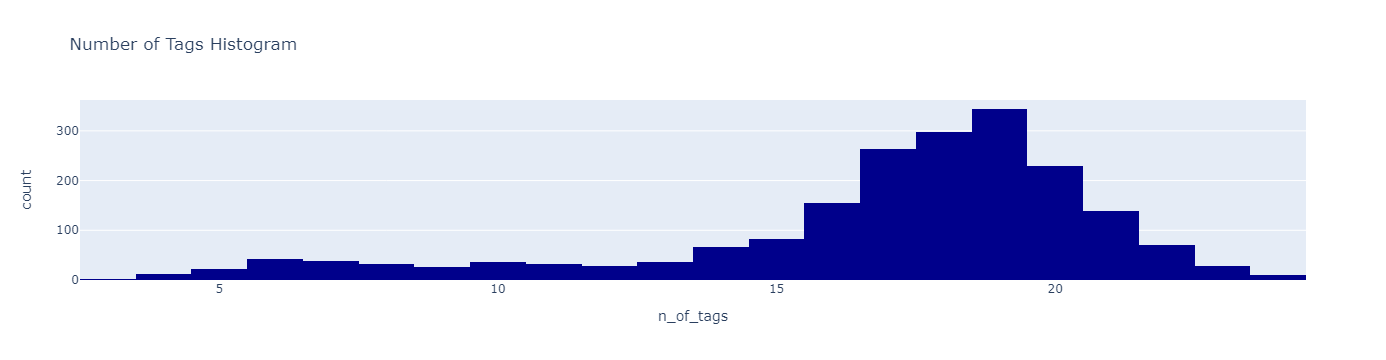

In [129]:


# Crea el gráfico interactivo con Plotly
fig1 = px.histogram(df, x="n_of_tags", nbins=30, title="Number of Tags Histogram")
fig1.update_traces(marker=dict(color='#00008B'), selector=dict(type='histogram'))

# Muestra el gráfico
fig1.show()


In [130]:
fig1.write_html("histogram.html")

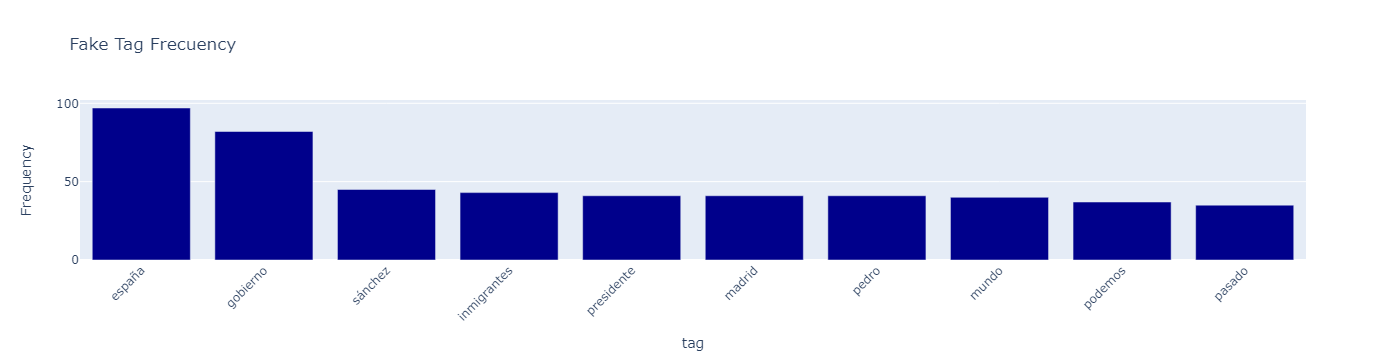

In [123]:
fig3 = px.bar(top_10_fakes, x=top_10_fakes.index, y="count", title="Fake Tag Frecuency", labels={"count": "Frequency", "index": "Tag"})
fig3.update_layout(xaxis_tickangle=-45)
fig3.update_traces(marker_color="#00008B")
fig3.show()

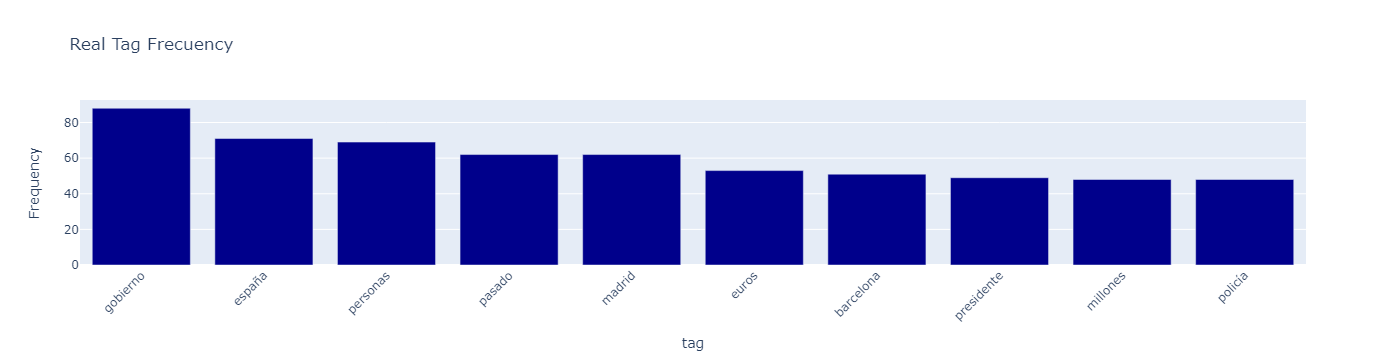

In [121]:
fig4 = px.bar(top_10_reals, x=top_10_reals.index, y="count", title="Real Tag Frecuency", labels={"count": "Frequency", "index": "Tag"})
fig4.update_layout(xaxis_tickangle=-45)
fig4.update_traces(marker_color="#00008B")
fig4.show()

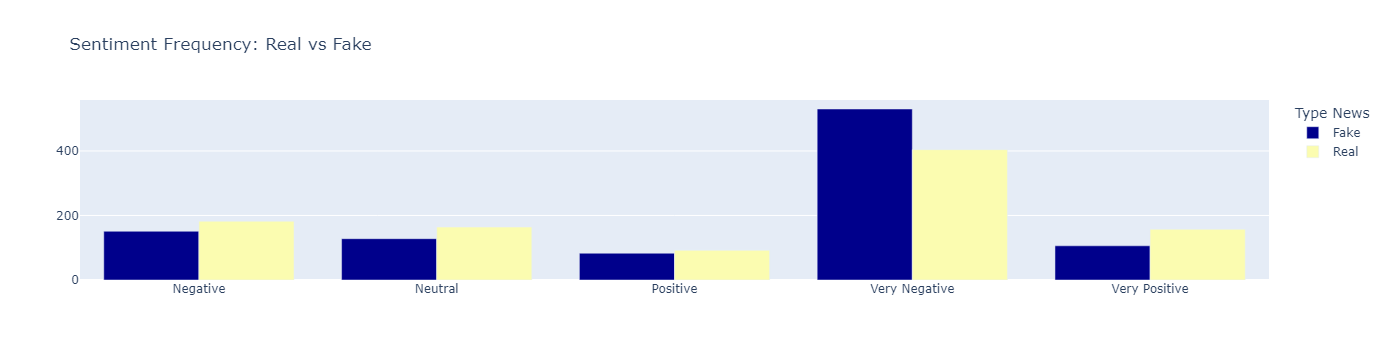

In [139]:
plot_data = df.groupby(['sentiment', 'type_news']).size().reset_index(name='count')

fig5 = px.bar(plot_data, x='sentiment', y='count', color='type_news', 
             barmode='group', title='Sentiment Frequency: Real vs Fake',
             labels={'sentiment': 'Sentiment', 'count': 'Frequency', 'type_news': 'Type News'},
             color_discrete_map={'Fake': "#00008B", 'Real': '#fbfcb0'})

fig5.update_layout(xaxis_title=None, yaxis_title=None)

fig5.show()